In [1]:
import matplotlib.pyplot as plt
import os
import cv2
from tqdm import tqdm
import tensorflow as tf
model=tf.keras.applications.MobileNetV2(include_top=False,weights='imagenet')

DATADIR = "C:/Users/EGYPT/OneDrive/Desktop/graduation project/gun detection dataset/Train"

In [2]:
DATADIR_2 = "C:/Users/EGYPT/OneDrive/Desktop/graduation project/gun detection dataset/Test"

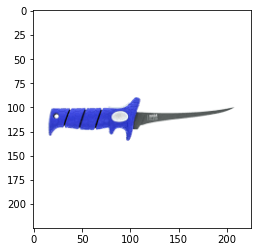

In [3]:
CATEGORIES=["weapon","no weapon"]
for category in CATEGORIES:  # do dogs and cats
    path = os.path.join(DATADIR,category)  # create path to dogs and cats
    for img in os.listdir(path):  # iterate over each image per dogs and cats
        img_array = cv2.imread(os.path.join(path,img))  # convert to array
        plt.imshow(img_array, cmap='gray')  # graph it
        plt.show()  # display!grrr

        break  # we just want one for now so break
    break  #...and one more!

In [4]:
training_data = []

def create_training_data():
    for category in CATEGORIES: 

        path = os.path.join(DATADIR,category)  # create path to dogs and cats
        class_num = CATEGORIES.index(category)  # get the classification  (0 or a 1). 0=dog 1=cat

        for img in tqdm(os.listdir(path)):  # iterate over each image per dogs and cats
            try:
                img_array = cv2.imread(os.path.join(path,img) )  # convert to array
                new_array = cv2.resize(img_array,(224,224))
                new_array =tf.keras.applications.mobilenet_v2.preprocess_input(new_array)
                training_data.append([new_array, class_num])  # add this to our training_data
            except Exception as e:  # in the interest in keeping the output clean...
                pass
            #except OSError as e:
            #    print("OSErrroBad img most likely", e, os.path.join(path,img))
            #except Exception as e:
            #    print("general exception", e, os.path.join(path,img))

create_training_data()

print(len(training_data))

100%|██████████| 2925/2925 [00:22<00:00, 127.94it/s]


5749


In [5]:
import numpy as np
X_train= []
y_train= []

for features,label in training_data:
    X_train.append(features)
    y_train.append(label)

X_train= np.array(X_train).reshape(-3,224,224, 3)
y_train= np.array(y_train)

In [6]:
X_train[55].shape

(224, 224, 3)

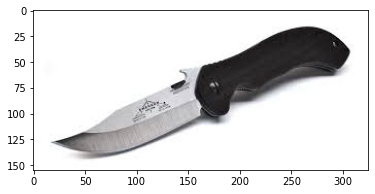

In [7]:
CAT=["weapon","no weapon"]
for categoryy in CAT:  # do dogs and cats
    paath = os.path.join(DATADIR_2,categoryy)  # create path to dogs and cats
    for imgg in os.listdir(paath):  # iterate over each image per dogs and cats
        img_arraay = cv2.imread(os.path.join(paath,imgg))  # convert to array
        plt.imshow(img_arraay, cmap='gray')  # graph it
        plt.show()  # display!

        break  # we just want one for now so break
    break  #...and one more!

In [8]:
test_data = []

def create_test_data():
    for categoryy in CAT: 

        paath = os.path.join(DATADIR_2,categoryy)  # create path to dogs and cats
        class_numm = CAT.index(categoryy)  # get the classification  (0 or a 1). 0=dog 1=cat

        for imgg in tqdm(os.listdir(paath)):  # iterate over each image per dogs and cats
            try:
                img_arraay = cv2.imread(os.path.join(paath,imgg) )  # convert to array
                new_arraay = cv2.resize(img_arraay,(224,224))
                new_arraay =tf.keras.applications.mobilenet_v2.preprocess_input(new_arraay)
                test_data.append([new_arraay, class_numm])  # add this to our training_data
            except Exception as e:  # in the interest in keeping the output clean...
                pass
            #except OSError as e:
            #    print("OSErrroBad img most likely", e, os.path.join(path,img))
            #except Exception as e:
            #    print("general exception", e, os.path.join(path,img))

create_test_data()

print(len(test_data))

100%|██████████| 279/279 [00:02<00:00, 137.01it/s]

477


In [9]:
X_test= []
y_test= []

for features,label in test_data:
    X_test.append(features)
    y_test.append(label)
print(X_test[0].reshape(-3, 224,224, 3))

X_test= np.array(X_test).reshape(-3,224,224,3)
y_test=np.array(y_test)

[[[[1. 1. 1.]
   [1. 1. 1.]
   [1. 1. 1.]
   ...
   [1. 1. 1.]
   [1. 1. 1.]
   [1. 1. 1.]]

  [[1. 1. 1.]
   [1. 1. 1.]
   [1. 1. 1.]
   ...
   [1. 1. 1.]
   [1. 1. 1.]
   [1. 1. 1.]]

  [[1. 1. 1.]
   [1. 1. 1.]
   [1. 1. 1.]
   ...
   [1. 1. 1.]
   [1. 1. 1.]
   [1. 1. 1.]]

  ...

  [[1. 1. 1.]
   [1. 1. 1.]
   [1. 1. 1.]
   ...
   [1. 1. 1.]
   [1. 1. 1.]
   [1. 1. 1.]]

  [[1. 1. 1.]
   [1. 1. 1.]
   [1. 1. 1.]
   ...
   [1. 1. 1.]
   [1. 1. 1.]
   [1. 1. 1.]]

  [[1. 1. 1.]
   [1. 1. 1.]
   [1. 1. 1.]
   ...
   [1. 1. 1.]
   [1. 1. 1.]
   [1. 1. 1.]]]]


In [27]:
X_train.shape
X_test.shape

(477, 224, 224, 3)

In [10]:
model.trainable=False
IMG_SHAPE = (224,224,3)
inputs=tf.keras.Input(shape=IMG_SHAPE)

In [11]:
X=model(inputs)
X=tf.keras.layers.Dense(128,activation='relu')(X)
X=tf.keras.layers.Dropout(0.3)(X)
X=tf.keras.layers.Flatten()(X) 
output=tf.keras.layers.Dense(1,activation='sigmoid')(X)
model=tf.keras.Model(inputs,output)

In [12]:
model.compile(optimizer=tf.keras.optimizers.Adam(0.01),
              loss=tf.keras.losses.BinaryCrossentropy(),
              metrics=['accuracy'])

In [13]:
check_point=tf.keras.callbacks.EarlyStopping(monitor='loss',restore_best_weights=True)
model.fit(X_train, y_train, batch_size=32, epochs=5,validation_data=(X_test,y_test),callbacks=[check_point])

Epoch 1/5
180/180 [==============================] - 172s 876ms/step - loss: 5.1676 - accuracy: 0.9424 - val_loss: 0.0591 - val_accuracy: 0.9832
Epoch 2/5
180/180 [==============================] - 153s 850ms/step - loss: 0.1078 - accuracy: 0.9741 - val_loss: 0.0478 - val_accuracy: 0.9853


In [28]:
img=cv2.imread('jj.jpg')
img=cv2.resize(img,(224,224))
img=img.reshape(1,224,224,3)
def pred(z) :
    x=model.predict(z)
    if x > 0.5 :
        print('safe')
    else:
        print('there is a weapon')

In [29]:
pred(img)

1/1 [==============================] - 0s 44ms/step
safe


In [30]:
model.save('model.h5')